In [2]:
! pip install pylatexenc
! pip install qiskit

In [3]:
# initialization
import numpy as np
from numpy import pi

# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
# from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.tools.visualization import circuit_drawer

# import basic plot tools
from qiskit.visualization import plot_histogram

from qiskit.quantum_info import Statevector

In [5]:
def measureOnAxis(circuit, qubit, cbit, axis='z'):
    circuit.barrier()
    if (axis=='z'):
        circuit.i(qubit)
    if (axis=='x'):
        circuit.h(qubit)
    if (axis=='y'):
        circuit.sdg(qubit)
        circuit.h(qubit)
    circuit.measure(qubit, cbit)

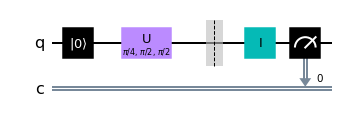

In [6]:
# Different measurements
n = 1
qreg_q = QuantumRegister(n, 'q')
creg_c = ClassicalRegister(n, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)



circuit.reset(qreg_q[0])
circuit.u(pi/4, pi/2, pi/2, qreg_q[0])

# measurement on some axis. 'z' is the default
measureOnAxis(circuit,qreg_q[0],creg_c[0],'z')

circuit.draw('mpl')

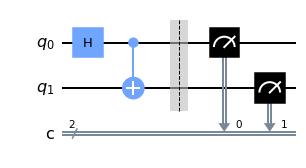

In [27]:
n = 2 # number of qubits
# n-qubit entanglement:
qreg_q = QuantumRegister(n, 'q')
creg_c = ClassicalRegister(n, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])

for i in range(1,n):
    circuit.cx(qreg_q[0], qreg_q[i])

circuit.barrier()
for i in range(n):
    circuit.measure(qreg_q[i], creg_c[i])

circuit.draw(output='mpl')
# editor = CircuitComposer(circuit=circuit)
# editor

Deterministic cluster states (https://www.science.org/doi/10.1126/science.aah4758):

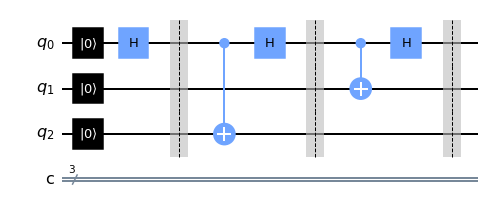

In [21]:
# Custom circuit
n = 3
qreg_q = QuantumRegister(n, 'q')
creg_c = ClassicalRegister(n, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

for i in range(0,n):
    circuit.reset(qreg_q[i])
    # circuit.x(qreg_q[i])

# Init "control bit" qunatum
circuit.h(qreg_q[0])

# Cycle
for i in range(n-1,0,-1):
    circuit.barrier()
    circuit.cx(qreg_q[0],qreg_q[i])
    circuit.h(qreg_q[0])

circuit.barrier()
# for i in range(0,n):
    # circuit.measure(qreg_q[i],creg_c[i])


circuit.draw('mpl')
# editor = CircuitComposer(circuit=circuit)
# editor

In [22]:
# Print state vector

# Set the intial state of the simulator to the ground state using from_int
state = Statevector.from_int(0, 2**n)

# # Evolve the state by the quantum circuit
state = state.evolve(circuit)

# #draw using latex
state.draw('latex')

<IPython.core.display.Latex object>

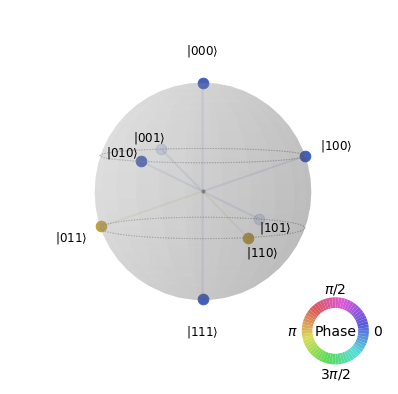

In [23]:
state.draw('qsphere')

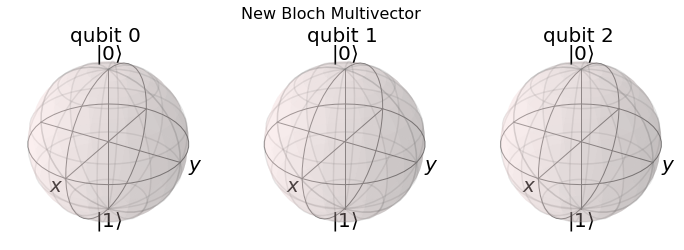

In [24]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

state = Statevector.from_instruction(circuit)
plot_bloch_multivector(state, title="New Bloch Multivector", reverse_bits=False)

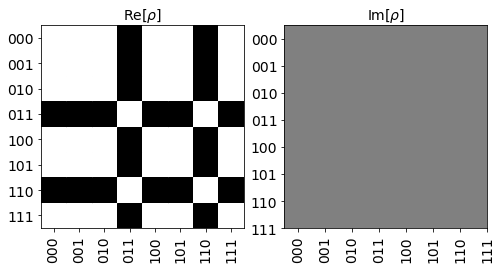

In [25]:
state.draw('hinton')

/Users/yiftachy/opt/anaconda3/lib/python3.8/site-packages/qiskit/utils/deprecation.py:62: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  return func(*args, **kwargs)


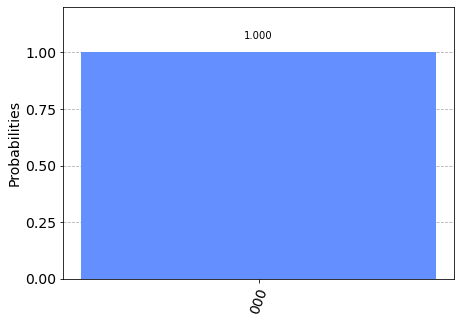

In [26]:
# use local simulator
aer_sim = Aer.get_backend('aer_simulator')
shots = 1024
# shots = 1000000 # max shots
qobj = assemble(circuit, aer_sim, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()

plot_histogram(answer)

In [14]:
# Load our saved IBMQ accounts and get the least busy backend device with greater than or equal to (n+1) qubits
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (n) and
                                                         not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_armonk


In [15]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(circuit, backend, optimization_level=0)
job = backend.run(transpiled_circuit)
job_monitor(job, interval=2)

Job Status: job incurred error    
